In [17]:
# 1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
# 2. Figure out if any preprocessing such as scaling would help here
# 3. Draw elbow plot and from that figure out optimal value of k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

from Logistic_regression import y_pred

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Keep only petal length and width
df = df[['petal length (cm)', 'petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width (cm)')

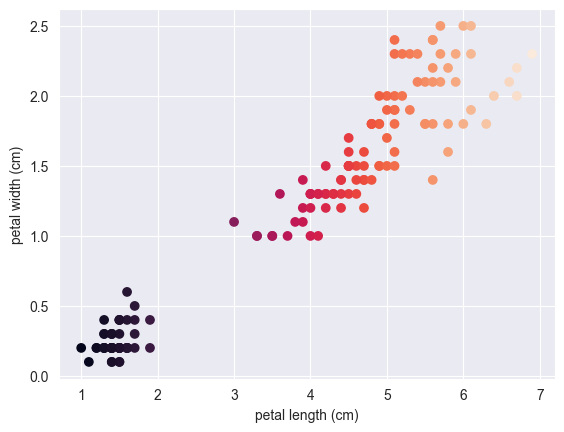

In [20]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.06779661, 0.04166667],
       [0.06779661, 0.04166667],
       [0.05084746, 0.04166667],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.11864407, 0.125     ],
       [0.06779661, 0.08333333],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.08474576, 0.        ],
       [0.08474576, 0.04166667],
       [0.10169492, 0.04166667],
       [0.06779661, 0.        ],
       [0.01694915, 0.        ],
       [0.03389831, 0.04166667],
       [0.08474576, 0.125     ],
       [0.05084746, 0.125     ],
       [0.06779661, 0.08333333],
       [0.11864407, 0.08333333],
       [0.08474576, 0.08333333],
       [0.11864407, 0.04166667],
       [0.08474576, 0.125     ],
       [0.        , 0.04166667],
       [0.11864407, 0.16666667],
       [0.15254237, 0.04166667],
       [0.10169492, 0.04166667],
       [0.10169492, 0.125     ],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.10169492, 0.04166667],
       [0.

Text(0, 0.5, 'sse')

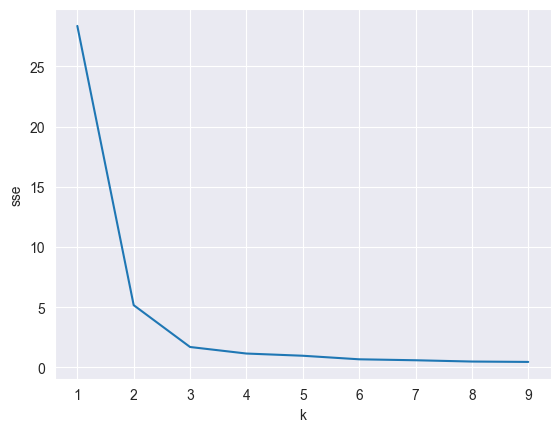

In [26]:
k_range=range(1,10)
sse=[]
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

%matplotlib inline
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('sse')
#from here we can extract that the K-means cluster is 3

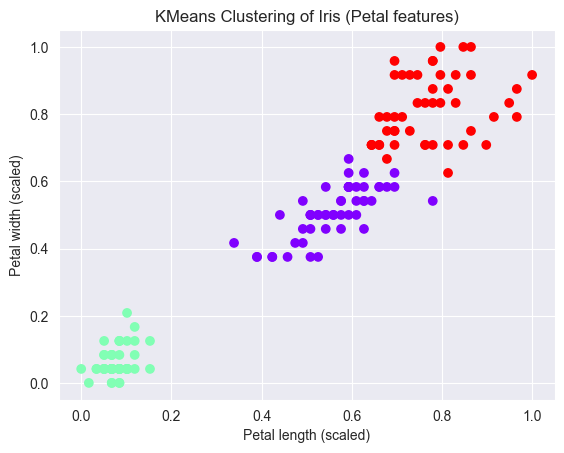

In [27]:
km=KMeans(n_clusters=3)
y_pred = km.fit_predict(df_scaled)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_pred, cmap='rainbow')
plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title("KMeans Clustering of Iris (Petal features)")
plt.show()